In [1]:
import psycopg2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    dbname="real_estate_proj_3",
    user="kyle",        # <--------------- READ THIS
    password="1234",    # <--------------- READ THIS
    host="localhost",
    port="5432"
)

In [2]:
# Write your SQL query
household_query = "SELECT * FROM households;"
real_estate_query = "SELECT * FROM real_estate;"

# Execute the query and load the results into a DataFrame
household_df = pd.read_sql_query(household_query, conn)
real_estate_df = pd.read_sql_query(real_estate_query, conn)

C:\Users\Kyle_McDaniel_Python\AppData\Local\Temp\ipykernel_7404\3461694898.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  household_df = pd.read_sql_query(household_query, conn)
C:\Users\Kyle_McDaniel_Python\AppData\Local\Temp\ipykernel_7404\3461694898.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  real_estate_df = pd.read_sql_query(real_estate_query, conn)


In [3]:
household_df = household_df.dropna()
#household_df = household_df[household_df['year'] == 2018]

In [4]:
real_estate_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,78477.0,for_sale,225000.0,3.0,1.0,3.93,1004268.0,Willington,Connecticut,6279.0,1572.0
1,41767.0,for_sale,579900.0,4.0,3.0,2.34,985290.0,Coventry,Connecticut,6238.0,3320.0
2,91020.0,for_sale,215000.0,2.0,1.0,0.91,1062364.0,East Windsor,Connecticut,6016.0,960.0
3,10585.0,for_sale,144900.0,2.0,1.0,0.36,765673.0,Vernon,Connecticut,6066.0,860.0
4,30125.0,for_sale,174900.0,3.0,2.0,0.19,1128958.0,Manchester,Connecticut,6040.0,1280.0
...,...,...,...,...,...,...,...,...,...,...,...
79603,53060.0,sold,385000.0,4.0,3.0,3.30,1470511.0,Swedesboro,New Jersey,8085.0,3335.0
79604,45045.0,sold,169999.0,2.0,2.0,0.08,1008570.0,Penns Grove,New Jersey,8069.0,1049.0
79605,30807.0,sold,199500.0,6.0,3.0,0.13,1645962.0,Penns Grove,New Jersey,8069.0,2483.0
79606,53060.0,sold,199000.0,3.0,2.0,0.52,1637543.0,Pennsville,New Jersey,8070.0,1844.0


In [5]:
household_df['zip_code'] = household_df['zip']
real_estate_df['zip_code'] = pd.to_numeric(real_estate_df['zip_code'], errors='coerce')
real_estate_df['zip_code'] = real_estate_df['zip_code'].astype(int)
household_df['zip_code'] = household_df['zip_code'].astype(int)

In [6]:
merged_df = pd.merge (household_df, real_estate_df, on = "zip_code", how = "inner")

In [7]:
merged_df

,zip,geography,Geographic Area Name,households,Households Margin of Error,Households Household Income in the Past 12 Months,year,zip_code,brokered_by,status,price,bed,bath,acre_lot,street,city,state,house_size
0,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,10571.0,for_sale,514900.0,4.0,3.0,3.22,236650.0,Avon,Connecticut,2500.0
1,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,10571.0,for_sale,549900.0,4.0,3.0,1.70,307568.0,Avon,Connecticut,2700.0
2,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,91793.0,for_sale,599900.0,4.0,5.0,2.02,1259869.0,Avon,Connecticut,5991.0
3,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,22611.0,for_sale,514900.0,4.0,3.0,0.96,243133.0,Avon,Connecticut,2500.0
4,6001,860Z200US06001,ZCTA5 06001,7570.0,314.0,32.7,2021,6001,107912.0,for_sale,1250000.0,4.0,7.0,2.25,956807.0,Avon,Connecticut,7422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875092,14905,8600000US14905,ZCTA5 14905,4218.0,317.0,25.6,2011,14905,53582.0,for_sale,104500.0,3.0,2.0,0.20,1609159.0,Elmira,New York,1674.0
875093,14905,8600000US14905,ZCTA5 14905,4218.0,317.0,25.6,2011,14905,53582.0,for_sale,159900.0,2.0,2.0,0.16,46795.0,Elmira,New York,1662.0
875094,14905,8600000US14905,ZCTA5 14905,4218.0,317.0,25.6,2011,14905,53582.0,for_sale,189000.0,3.0,2.0,0.20,794827.0,Elmira,New York,2030.0
875095,14905,8600000US14905,ZCTA5 14905,4218.0,317.0,25.6,2011,14905,53582.0,for_sale,60000.0,8.0,2.0,0.20,1191382.0,Elmira,New York,3480.0


In [8]:
zipcodes = ["12207","12208", "12209", "12210", "12211",
            "6103", "6105", "6106", "6112", "6120",
           "8608","8609", "8610", "8611", "8618"]
household3_df = household_df[household_df['zip'].isin(zipcodes)].reset_index()
merged2_df = pd.merge (household3_df, real_estate_df, on = "zip_code", how = "inner")
merged2_df


,index,zip,geography,Geographic Area Name,households,Households Margin of Error,Households Household Income in the Past 12 Months,year,zip_code,brokered_by,status,price,bed,bath,acre_lot,street,city,state,house_size
0,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,22611.0,for_sale,224900.0,4.0,3.0,0.21,1335988.0,Hartford,Connecticut,3404.0
1,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,33714.0,for_sale,270000.0,9.0,4.0,0.19,943362.0,Hartford,Connecticut,4526.0
2,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,22611.0,for_sale,249900.0,3.0,2.0,0.14,1745256.0,Hartford,Connecticut,2950.0
3,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,51868.0,for_sale,699900.0,6.0,5.0,1.14,755732.0,Hartford,Connecticut,4660.0
4,1752,6105,860Z200US06105,ZCTA5 06105,9685.0,637.0,35.7,2021,6105,79217.0,for_sale,450000.0,13.0,3.0,0.24,386959.0,Hartford,Connecticut,4094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,82956.0,sold,499900.0,3.0,3.0,0.17,1312415.0,Colonie,New York,2400.0
10952,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,45690.0,sold,349900.0,4.0,2.0,0.49,1448789.0,Colonie,New York,1900.0
10953,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,45690.0,sold,289900.0,4.0,2.0,0.36,329591.0,Colonie,New York,2262.0
10954,335092,12211,8600000US12211,ZCTA5 12211,4043.0,244.0,22.5,2011,12211,69769.0,sold,270900.0,2.0,1.0,0.33,436970.0,Colonie,New York,1042.0


In [9]:
# Get unique states
states = merged2_df['state'].unique()

In [10]:
states

array(['Connecticut', 'New Jersey', 'New York'], dtype=object)

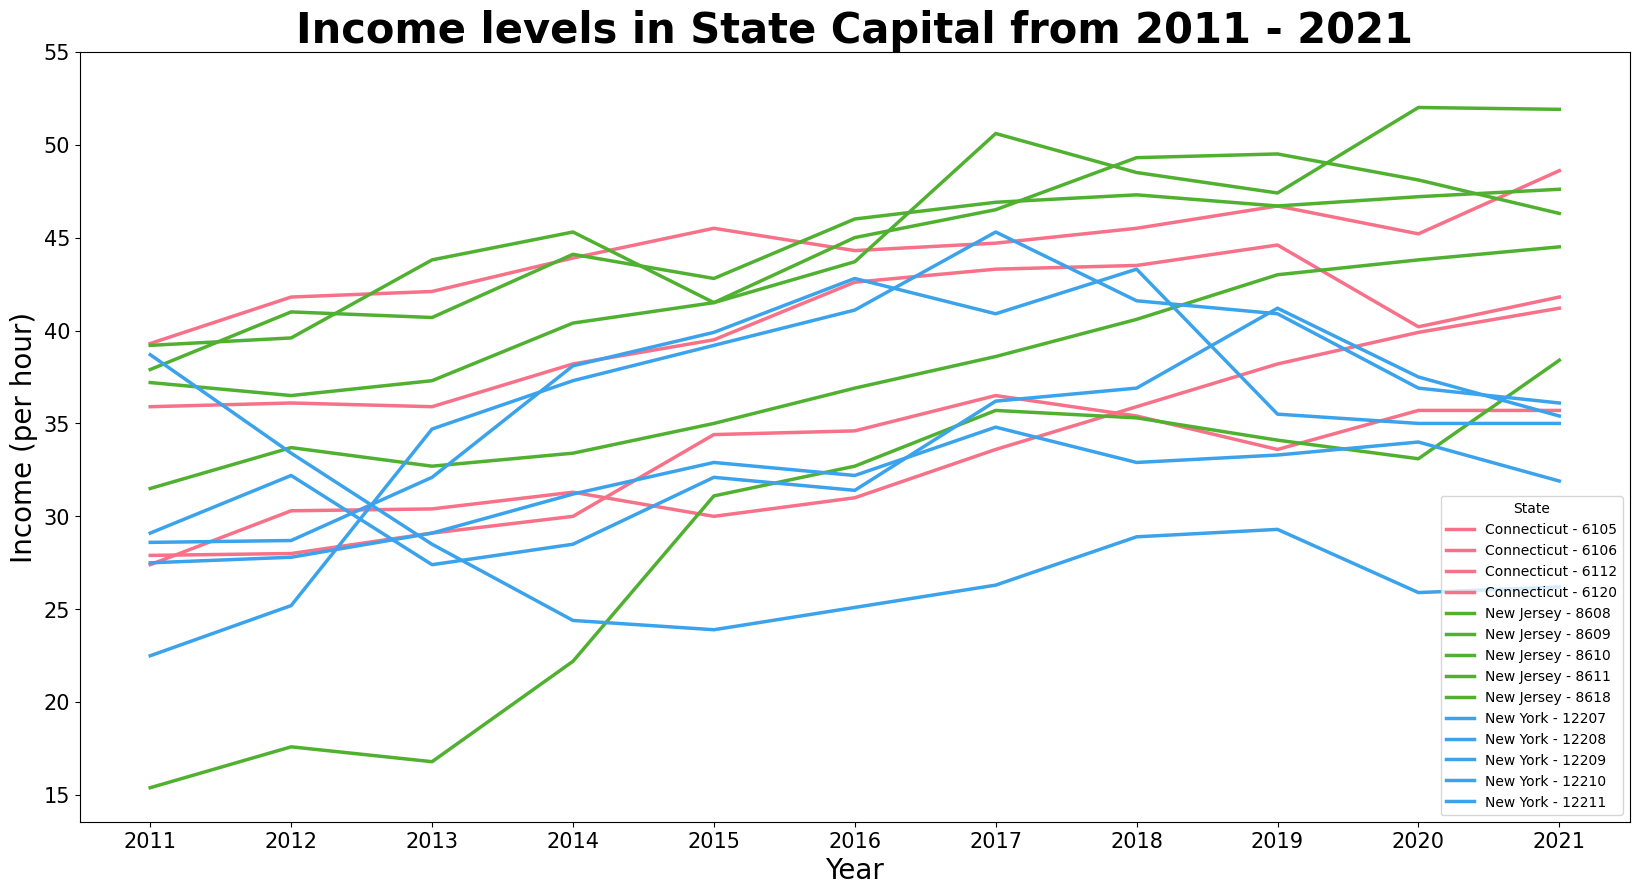

In [11]:
zipcodes = ["12207","12208", "12209", "12210", "12211",
            "6103", "6105", "6106", "6112", "6120",
           "8608","8609", "8610", "8611", "8618"]
household3_df = household_df[household_df['zip'].isin(zipcodes)].reset_index()
merged2_df = pd.merge (household3_df, real_estate_df, on = "zip_code", how = "inner")
merged2_df

# Get unique states
states = merged2_df['state'].unique()

# Generate a color palette with different shades for each state
palette = sns.color_palette("husl", len(states))
state_colors = dict(zip(states, palette))

# Set the plot size for better visibility
plt.figure(figsize=(20, 10))

# Plot each ZIP code's income trend, color-coded by state
for state in states:
    state_data = merged2_df[merged2_df['state'] == state]
    for zipcode in state_data['zip_code'].unique():
        zip_data = state_data[state_data['zip_code'] == zipcode]
        plt.plot(zip_data['year'], zip_data['Households Household Income in the Past 12 Months'],
                 label=f"{state} - {zipcode}", color=state_colors[state], alpha=1, linewidth=2.5)

# Add labels and title
plt.xlabel('Year', fontsize = 20)
plt.xticks(range(2011, 2022), fontsize = 15)
plt.ylabel('Income (per hour)', fontsize = 20)
plt.yticks(range(15,60,5), fontsize = 15)
plt.title('Income levels in State Capital from 2011 - 2021', fontsize = 30, fontweight='bold')
plt.legend(title='State')

# Show the plot
plt.show()

In [12]:
# Calculate percent change in income levels from 2011 to 2021 grouped by state
summary = merged2_df.pivot_table(index='state',
                                 values='Households Household Income in the Past 12 Months',
                                 columns='year',
                                 aggfunc='mean').reset_index()
summary['percent_change'] = ((summary[2021] - summary[2011]) / summary[2011]) * 100

# Select only the necessary columns
summary = summary[['state', 'percent_change']]
summary = summary.rename(columns={'percent_change': 'Percent Change',
                                 'state':'State'})
# Display the summary DataFrame
summary

year,State,Percent Change
0,Connecticut,34.506539
1,New Jersey,30.859255
2,New York,26.478514


In [13]:
#zipcodes = ["12207","12208", "12209", "12210", "12211",
#            "6103", "6105", "6106", "6112", "6120",
#           "8608","8609", "8610", "8611", "8618"]
#household3_df = household_df[household_df['zip'].isin(zipcodes)].reset_index()
price_per_sqft_df = real_estate_df

In [14]:
price = 'price'
house_size = 'house_size'
price_per_sqft = 'price_per_sqft'

price_per_sqft_df[price_per_sqft] = price_per_sqft_df[price] / price_per_sqft_df[house_size]

price_per_sqft_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,price_per_sqft
0,78477.0,for_sale,225000.0,3.0,1.0,3.93,1004268.0,Willington,Connecticut,6279,1572.0,143.129771
1,41767.0,for_sale,579900.0,4.0,3.0,2.34,985290.0,Coventry,Connecticut,6238,3320.0,174.668675
2,91020.0,for_sale,215000.0,2.0,1.0,0.91,1062364.0,East Windsor,Connecticut,6016,960.0,223.958333
3,10585.0,for_sale,144900.0,2.0,1.0,0.36,765673.0,Vernon,Connecticut,6066,860.0,168.488372
4,30125.0,for_sale,174900.0,3.0,2.0,0.19,1128958.0,Manchester,Connecticut,6040,1280.0,136.640625
...,...,...,...,...,...,...,...,...,...,...,...,...
79603,53060.0,sold,385000.0,4.0,3.0,3.30,1470511.0,Swedesboro,New Jersey,8085,3335.0,115.442279
79604,45045.0,sold,169999.0,2.0,2.0,0.08,1008570.0,Penns Grove,New Jersey,8069,1049.0,162.058151
79605,30807.0,sold,199500.0,6.0,3.0,0.13,1645962.0,Penns Grove,New Jersey,8069,2483.0,80.346355
79606,53060.0,sold,199000.0,3.0,2.0,0.52,1637543.0,Pennsville,New Jersey,8070,1844.0,107.917570


In [15]:
price_per_sqft_df = price_per_sqft_df.groupby('city')['price_per_sqft'].mean().reset_index()

price_per_sqft_df

,city,price_per_sqft
0,Aberdeen,262.157541
1,Absecon,167.480816
2,Accord,315.405487
3,Acra,197.187612
4,Adams,104.615154
...,...,...
2379,Yorktown Heights,360.874461
2380,Yorkville,109.640952
2381,Youngstown,180.601062
2382,Youngsville,282.239819


In [16]:
some_cities = ['Hartford', 'Trenton', 'Albany', 'Newark', 'Stamford', 'New York']

price_per_sqft_df = price_per_sqft_df[price_per_sqft_df['city'].isin(some_cities)]

price_per_sqft_df['price_per_sqft'] = price_per_sqft_df['price_per_sqft'].apply(lambda x: f'{x:.2f}')

price_per_sqft_df

C:\Users\Kyle_McDaniel_Python\AppData\Local\Temp\ipykernel_7404\2183547621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_per_sqft_df['price_per_sqft'] = price_per_sqft_df['price_per_sqft'].apply(lambda x: f'{x:.2f}')


,city,price_per_sqft
13,Albany,118.68
907,Hartford,109.43
1458,New York,876.31
1461,Newark,149.37
2040,Stamford,316.10
2125,Trenton,135.96


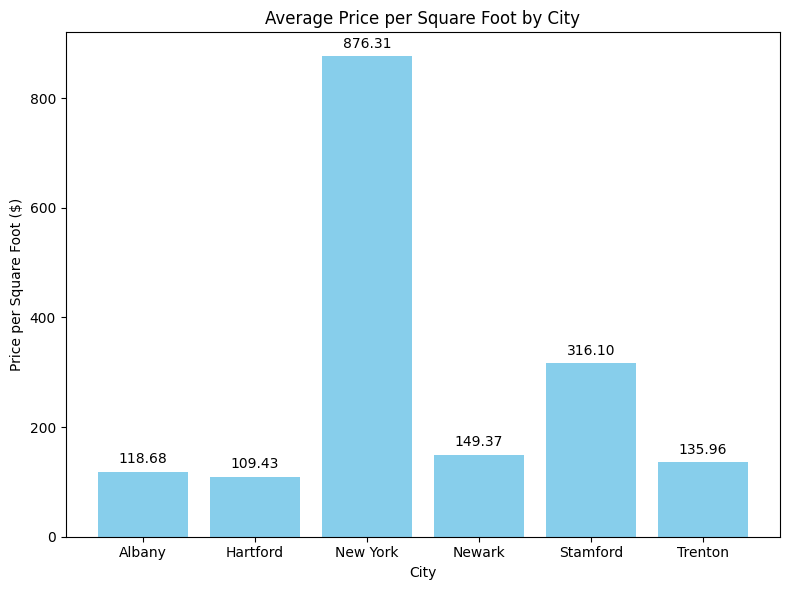

In [17]:
plt.figure(figsize=(8, 6))
bars = plt.bar(price_per_sqft_df['city'], price_per_sqft_df['price_per_sqft'].astype(float), color='skyblue')
plt.xlabel('City')
plt.ylabel('Price per Square Foot ($)')
plt.title('Average Price per Square Foot by City')

# Adding data labels
for i, price in enumerate(price_per_sqft_df['price_per_sqft']):
    plt.text(i, float(price) + 10, f'{price}', ha='center', va='bottom')
    
# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
price_per_sqft_df_imp = price_per_sqft_df